In [86]:
#importing libraries                                   
import librosa                                         #for audio and music analysis
import librosa.display
import pandas as pd                                    #is used to analyze data
import soundfile                                       #to read the audio file of different formats 
import pyttsx3                                         # text-to-speech conversion library in Python.
import os                                              #to use operating system dependent functionality
import sys                                             #provides functions and variables                               
import glob, pickle                                    # returns all file paths that match a specific pattern       
                                                       # to save model after training
import numpy as np                                     #Used for working with arrays
import sklearn                                         #for performing different machine learning operations.
from IPython.display import Audio                      #display the audio player
from scipy import stats                                #eturn the sample rate (in samples/sec) and data from a WAV file.
from sklearn.model_selection import train_test_split   # Split arrays or matrices into random train and test subsets
from sklearn.neural_network import MLPClassifier       # multi layer perceptron classifier
from sklearn.metrics import accuracy_score             # utility functions to measure classification performance 
import seaborn as sns                                   
import matplotlib.pyplot as plt                        #for plotting and visualizing data
import warnings                                        #used to show warning messages
warnings.filterwarnings("ignore")

In [87]:
# load the dataset
Ravdess = "C:\Data/"

In [88]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))            
        file_path.append(Ravdess + dir + '/' + file)
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])\

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Data/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,C:\Data/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,C:\Data/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,C:\Data/Actor_01/03-01-01-01-02-02-01.wav
4,calm,C:\Data/Actor_01/03-01-02-01-01-01-01.wav


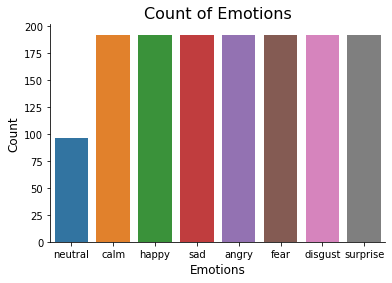

In [53]:
#visualising the countplot
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [54]:
#creating the waveplot and spectrograms of various emotions
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

In [89]:
emotion='fear'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)


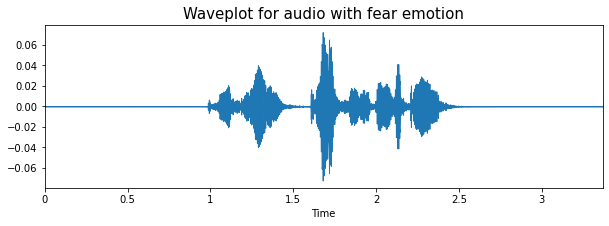

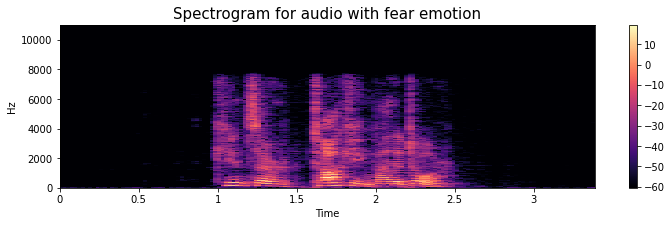

In [96]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


In [90]:
Audio(path)

In [91]:
emotion='angry'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

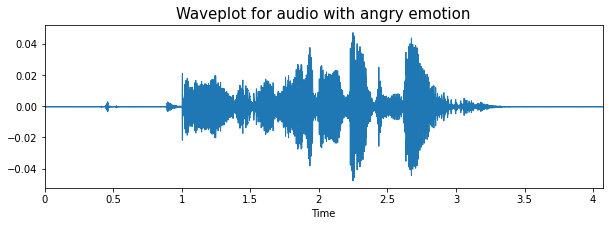

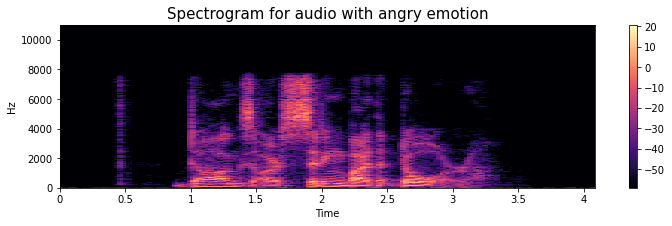

In [99]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

In [92]:
Audio(path)

In [93]:
emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

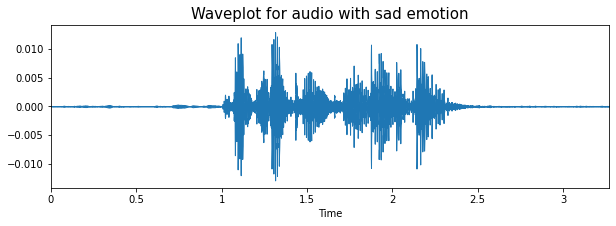

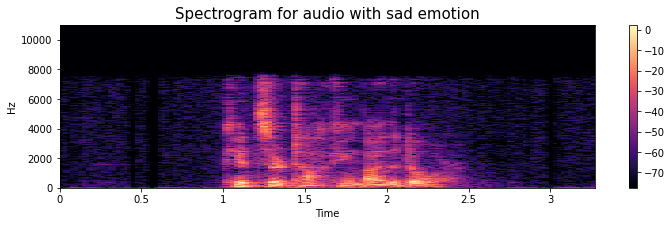

In [102]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


In [94]:
Audio(path)

In [95]:
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)


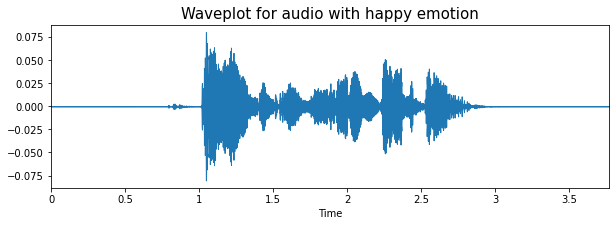

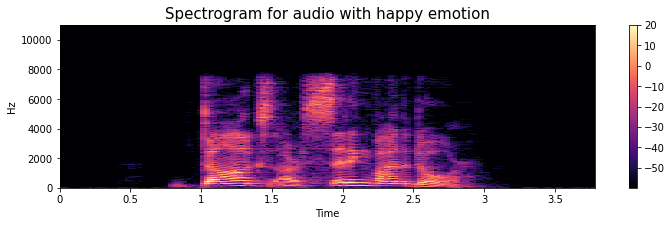

In [105]:
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)


In [62]:
Audio(path)

In [96]:
 # Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [97]:
# Emotions in dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [99]:
# Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [100]:
# Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [101]:
# observe the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(614, 154)


In [102]:
# number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [103]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [104]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [105]:
# Predict for the test set
y_pred=model.predict(x_test)

In [72]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.97%


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.92      0.77      0.84        44
     disgust       0.78      0.76      0.77        41
     fearful       0.66      0.76      0.70        33
       happy       0.69      0.75      0.72        36

    accuracy                           0.76       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.77      0.76      0.76       154



In [107]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[34  2  5  3]
 [ 2 31  4  4]
 [ 0  3 25  5]
 [ 1  4  4 27]]


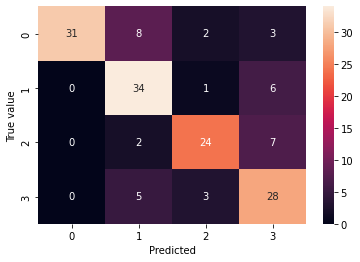

In [75]:
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [109]:
filex="C:\\Data/Actor_08/03-01-02-01-02-02-08.wav"
Audio(filex)

In [110]:
featurex=extract_feature(filex,mfcc=True,chroma=True,mel=True)

In [111]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_predx=model.predict([featurex])
accuracyx=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracyx*100))
y_predx

Accuracy: 77.92%


array(['calm'], dtype='<U7')

In [78]:
speakerx = pyttsx3.init()        

In [112]:
def talk(text):
    speakerx.say(text)
    speakerx.runAndWait()       

In [113]:
#print(y_pred)
talk(' the obeserved emotion from the given audio file is ')
talk(y_predx)
talk(' and the accuracy of detection of emotion is  ')
accu=int(accuracyx*100)
talk(accu)
talk('%')

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.97      0.80      0.88        44
     disgust       0.70      0.85      0.77        41
     fearful       0.71      0.76      0.74        33
       happy       0.76      0.69      0.72        36

    accuracy                           0.78       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.79      0.78      0.78       154



In [82]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[38  2  2  2]
 [ 5 29  4  3]
 [ 0  2 24  7]
 [ 1  2  6 27]]


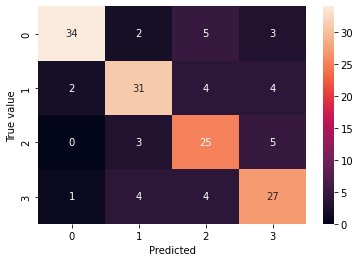

In [115]:
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()

In [116]:
import webbrowser                        
if y_predx[0]=="calm":
   webbrowser.open('https://www.youtube.com/watch?v=wpRAUK8wkno')
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DX1s9knjP51Oa?si=z2s6qgUPSfSadvPBPAt7Lw&utm_source=copy-link&nd=1')
elif y_predx[0]=="happy":
   webbrowser.open('https://www.youtube.com/watch?v=LR3cE0o8o7Q')            
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DWTwbZHrJRIgD?si=qV_dO5PvR1iTy4Skm1n8OA&utm_source=copy-link&nd=1')
elif y_predx[0]=="sad":
   webbrowser.open('https://www.youtube.com/watch?v=BtZGB2wBesc')
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DWVrtsSlLKzro?si=PRNjmEdWS2ezxvhvj0c6pg&utm_source=copy-link&nd=1')
elif y_predx[0]=="disgust":
   webbrowser.open('https://www.youtube.com/watch?v=Qhmd3hfYJ0s')
elif y_predx[0]=="fearful":
   webbrowser.open('https://www.youtube.com/watch?v=4m_Alceujck')
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DWVrtsSlLKzro?si=PRNjmEdWS2ezxvhvj0c6pg&utm_source=copy-link&nd=1')
elif y_predx[0]=="angry":
   webbrowser.open('https://www.youtube.com/watch?v=lw82I3zeSkc')
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DWVrtsSlLKzro?si=PRNjmEdWS2ezxvhvj0c6pg&utm_source=copy-link&nd=1')
       


In [120]:
import pyaudio
import numpy

RATE=16000
RECORD_SECONDS = 5
CHUNKSIZE = 1024

# initialize portaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=RATE, input=True, frames_per_buffer=CHUNKSIZE)

frames = [] # A python-list of chunks(numpy.ndarray)
for _ in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
    data = stream.read(CHUNKSIZE)
    frames.append(numpy.fromstring(data, dtype=numpy.int16))

#Convert the list of numpy-arrays into a 1D array (column-wise)
numpydata = numpy.hstack(frames)

# close stream
stream.stop_stream()
stream.close()
p.terminate()
import scipy.io.wavfile as wav
wav.write('out.wav',RATE,numpydata)
 

In [121]:
filex="out.wav"
Audio(filex)

In [122]:
featurex=extract_feature(filex,mfcc=True,chroma=True,mel=True)

In [123]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_predx=model.predict([featurex])
accuracyx=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracyx*100))
y_predx

Accuracy: 72.73%


array(['happy'], dtype='<U7')

In [124]:
import webbrowser             #
if y_predx[0]=="calm":
   webbrowser.open('https://www.youtube.com/watch?v=wpRAUK8wkno')
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DX1s9knjP51Oa?si=z2s6qgUPSfSadvPBPAt7Lw&utm_source=copy-link&nd=1')
elif y_predx[0]=="happy":             
   webbrowser.open('https://www.youtube.com/watch?v=LR3cE0o8o7Q')
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DWTwbZHrJRIgD?si=qV_dO5PvR1iTy4Skm1n8OA&utm_source=copy-link&nd=1')
elif y_predx[0]=="sad":
   webbrowser.open('https://www.youtube.com/watch?v=BtZGB2wBesc')
   webbrowser.open('https://open.spotify.com/playlist/37i9dQZF1DWVrtsSlLKzro?si=PRNjmEdWS2ezxvhvj0c6pg&utm_source=copy-link&nd=1')
elif y_predx[0]=="disgust":
   webbrowser.open('https://www.youtube.com/watch?v=Qhmd3hfYJ0s')
elif y_predx[0]=="fearful":
   webbrowser.open('https://www.youtube.com/watch?v=4m_Alceujck')
   webbrowser.open('https://open.spotify.com/playlist/4yQlWYkAfcEM2Luo2YFmbp?si=oiB5Ar_7Qla-Nnq0oFzHCw&utm_source=copy-link&nd=1')
elif y_predx[0]=="angry":
   webbrowser.open('https://www.youtube.com/watch?v=lw82I3zeSkc')
   webbrowser.open('https://open.spotify.com/playlist/4yQlWYkAfcEM2Luo2YFmbp?si=oiB5Ar_7Qla-Nnq0oFzHCw&utm_source=copy-link&nd=1')
       

In [47]:
#print(y_pred)
talk(' the obeserved emotion from the given audio file is ')
talk(y_predx)
talk(' and the accuracy of detection of emotion is  ')
accu=int(accuracyx*100)
talk(accu)
talk('%')

In [48]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[34  4  6  0]
 [ 4 20 11  6]
 [ 0  0 28  5]
 [ 2  3  7 24]]


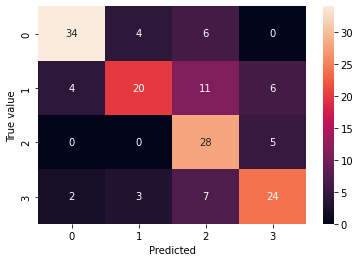

In [49]:
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')
plt.show()